### **Essais des différentes approches de modélisation**

## **Import des packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi
import time
import datetime
import datetime as dt

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Projet 4/mydata.csv")

In [3]:
data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-22 10:57:03,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-15 11:34:13,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-23 16:06:31,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-15 16:39:01,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-03 10:54:59,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118305,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,...,2018-05-14 12:53:47,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
118306,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,...,2018-07-25 09:25:29,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
118307,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,...,2017-10-29 21:33:52,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure
118308,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,...,2017-08-18 12:24:05,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0,computers_accessories


## **Constitution du fichier RFM**

### **Agrégation des données**

In [4]:
PRESENT = dt.datetime(2018, 9, 3)
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
DATA=data[['order_id','customer_id','order_purchase_timestamp','payment_value']]

In [5]:
DATA['order_purchase_timestamp'].min(), DATA['order_purchase_timestamp'].max()

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-09-03 09:06:57'))

In [6]:
DATA['order_purchase_timestamp'] = pd.to_datetime(DATA['order_purchase_timestamp'])

<ipython-input-6-951858731ba1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['order_purchase_timestamp'] = pd.to_datetime(DATA['order_purchase_timestamp'])


In [7]:
rfm = DATA.groupby('customer_id').agg({'order_purchase_timestamp': lambda date: (PRESENT - date.max()).days,
                                        'order_id': lambda num: len(num),
                                      'payment_value': lambda payment_value: payment_value.sum()})

In [8]:
rfm.columns=['recency', 'frequency', 'monetary']

In [9]:
rfm['recency'] = rfm['recency'].astype(int)

In [10]:
rfm

,recency,frequency,monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,292,1,114.74
000161a058600d5901f007fab4c27140,413,1,67.41
0001fd6190edaaf884bcaf3d49edf079,551,1,195.42
0002414f95344307404f0ace7a26f1d5,382,1,179.35
000379cdec625522490c315e70c7a9fb,153,1,107.01
...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,169,1,91.91
fffecc9f79fd8c764f843e9951b11341,157,3,81.36
fffeda5b6d849fbd39689bb92087f431,103,1,63.13


### **Analyse des données RFM**

In [11]:
rfm.isnull().sum()

recency      0
frequency    0
monetary     0
dtype: int64

Pas de NAN dans dataframe RFM

In [12]:
rfm.describe(include="all")

,recency,frequency,monetary
count,98666.000000,98666.000000,98666.000000
mean,244.716072,1.199096,206.928856
std,153.392934,0.752185,624.176329
min,-1.000000,1.000000,0.000000
25%,121.000000,1.000000,62.910000
50%,226.000000,1.000000,110.320000
75%,355.000000,1.000000,196.542500
max,728.000000,63.000000,109312.640000


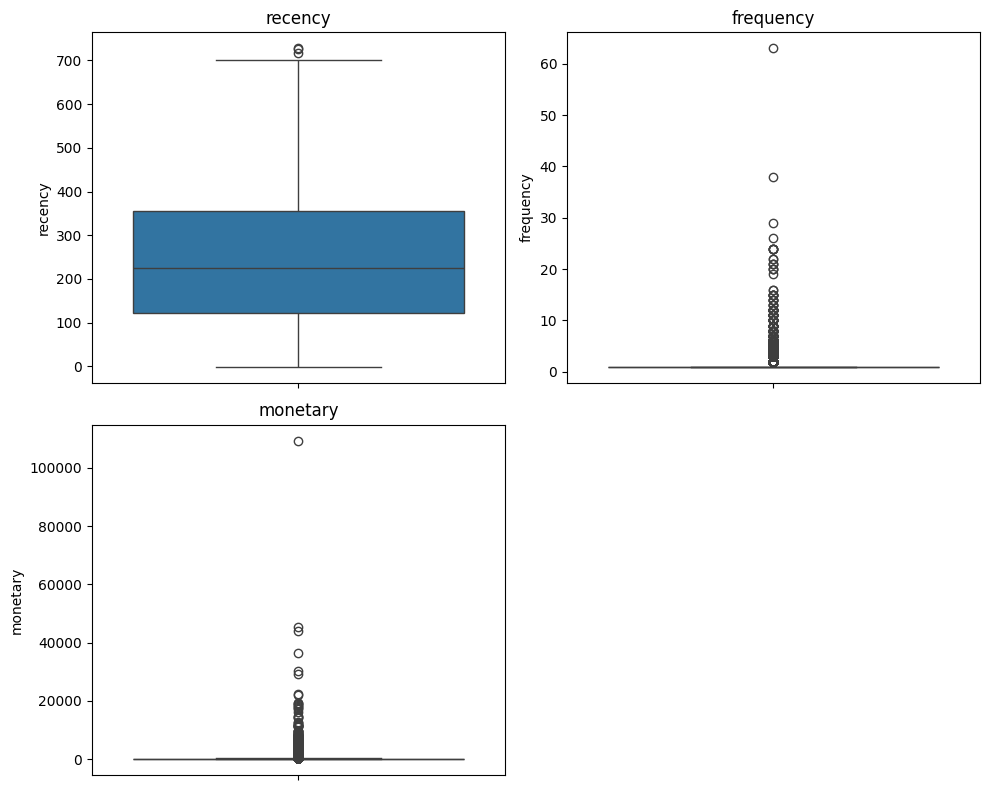

In [13]:
num_cols = len(rfm.columns)

num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(rfm.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(y=column, data=rfm)
    plt.title(column)

plt.tight_layout()
plt.show()

En analysant ces deux précedents graphiques, on remarque nettement la présence d'outliers pouvant impacter la performance de nos algoritmes de clustering

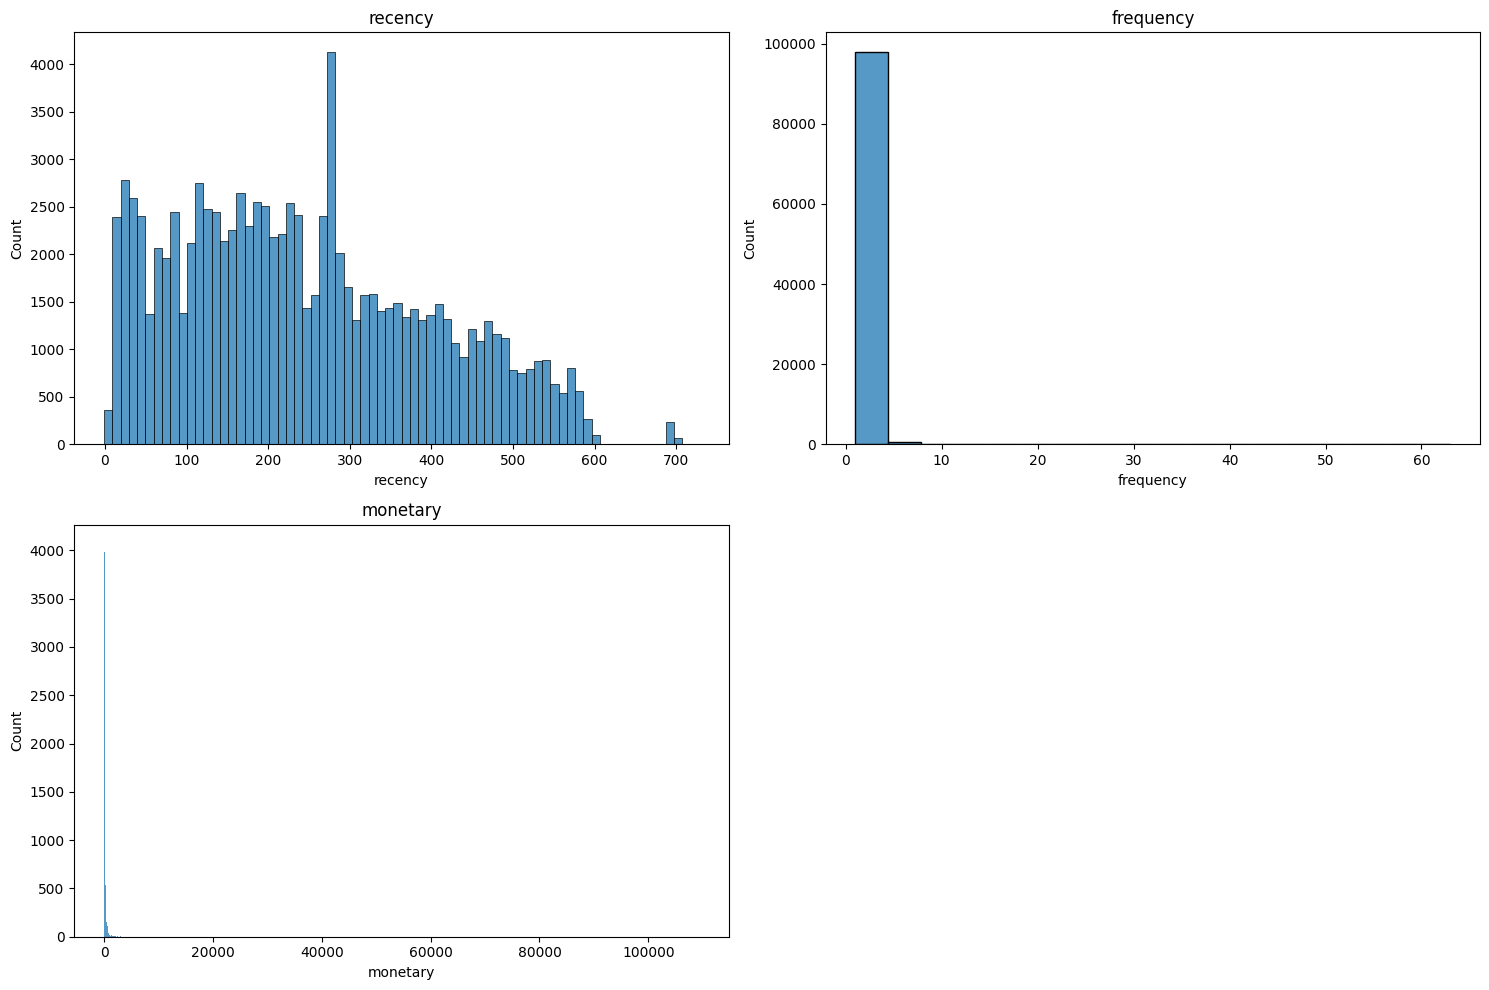

In [14]:
num_cols = len(rfm.columns)
num_rows = num_cols // 2 if num_cols % 2 == 0 else num_cols // 2 + 1

plt.figure(figsize=(15, num_rows*5))
for i, column in enumerate(rfm.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(rfm[column].dropna())
    plt.title(column)
plt.tight_layout()
plt.show()

Aucune des features RFM n'a une distribution normale

### **Analyse bivariée**

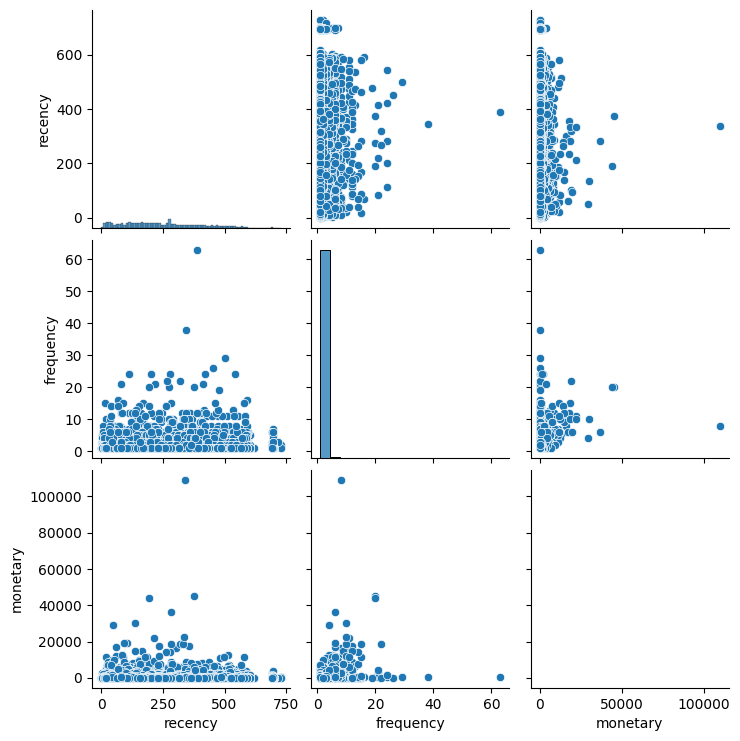

In [15]:
sns.pairplot(rfm)
plt.show()

### **Normalisation les données**

In [16]:
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm)

## **Clustering avec Kmeans**

### **Détermination du K optimal**

In [17]:
from sklearn.pipeline import Pipeline, make_pipeline
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

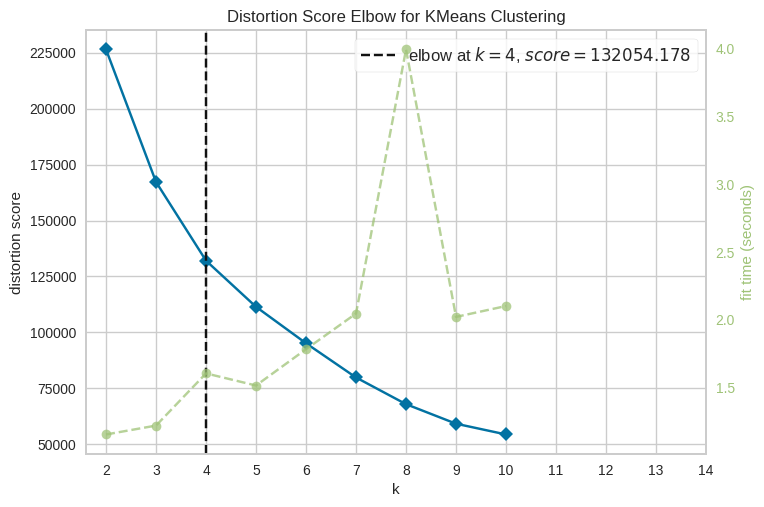

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
random_seed = 42
kmeans = KMeans(n_clusters=(2,12), n_init=10, random_state=random_seed)
kmeans_visualizer = Pipeline([
      ("kelbowvisualizer", KElbowVisualizer(KMeans()))])
kmeans_visualizer.fit(rfm_normalized)
plt.xticks(range(2,15))
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

Au regard de la courbe de l'inertie et du score de silhouette, le nombre de k optimal est 4

### **Application du k optimal trouvé**

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

### **Ajout des labels de cluster au DataFrame**

In [20]:
rfm['cluster_label'] = kmeans.labels_
rfm

,recency,frequency,monetary,cluster_label
customer_id,,,,
00012a2ce6f8dcda20d059ce98491703,292,1,114.74,0
000161a058600d5901f007fab4c27140,413,1,67.41,0
0001fd6190edaaf884bcaf3d49edf079,551,1,195.42,0
0002414f95344307404f0ace7a26f1d5,382,1,179.35,0
000379cdec625522490c315e70c7a9fb,153,1,107.01,1
...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,169,1,91.91,1
fffecc9f79fd8c764f843e9951b11341,157,3,81.36,3
fffeda5b6d849fbd39689bb92087f431,103,1,63.13,1


### **Interprétation des groupes**

In [21]:
rfm['cluster_label'].value_counts()

1    55241
0    40379
3     3025
2       21
Name: cluster_label, dtype: int64

In [22]:
cluster_stats = rfm.groupby('cluster_label')[rfm.columns].mean()
cluster_stats

,recency,frequency,monetary,cluster_label
cluster_label,,,,
0,395.457045,1.113277,169.348202,0.0
1,134.483047,1.099039,167.807541,1.0
2,230.952381,10.904762,26669.611905,2.0
3,245.675372,4.104463,1239.277127,3.0


### **Boxplot clusters par feature**

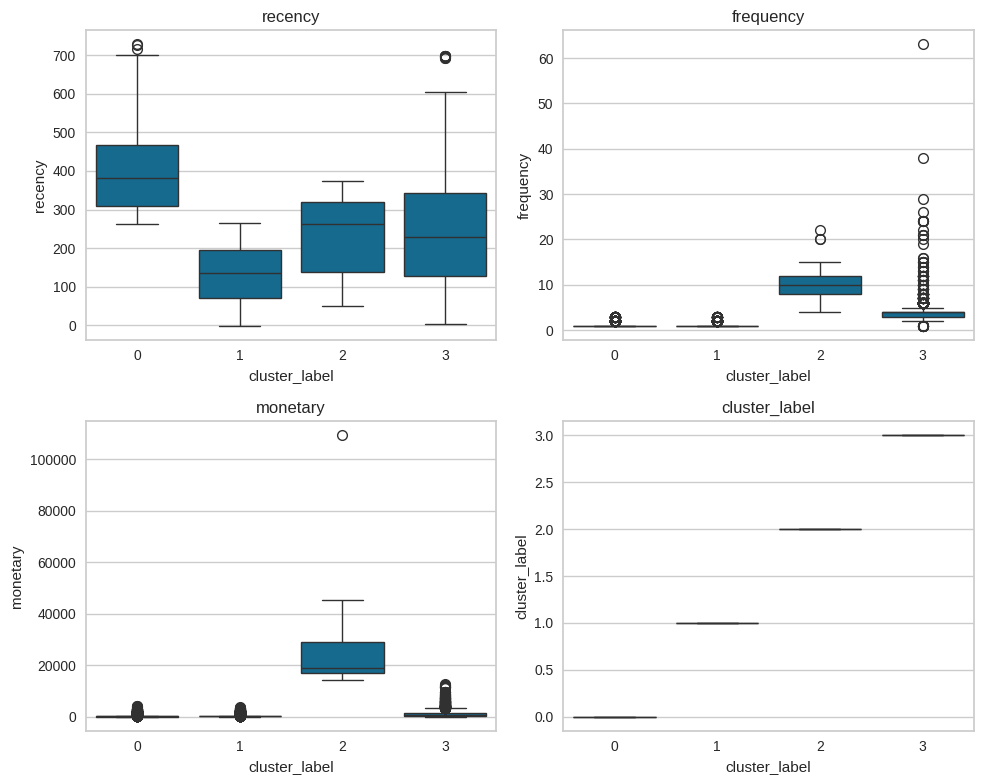

In [23]:
num_cols = len(rfm.columns)

num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(rfm.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='cluster_label', y=column, data=rfm)
    plt.title(column)

plt.tight_layout()
plt.show()

### **Visualisation des clusters**

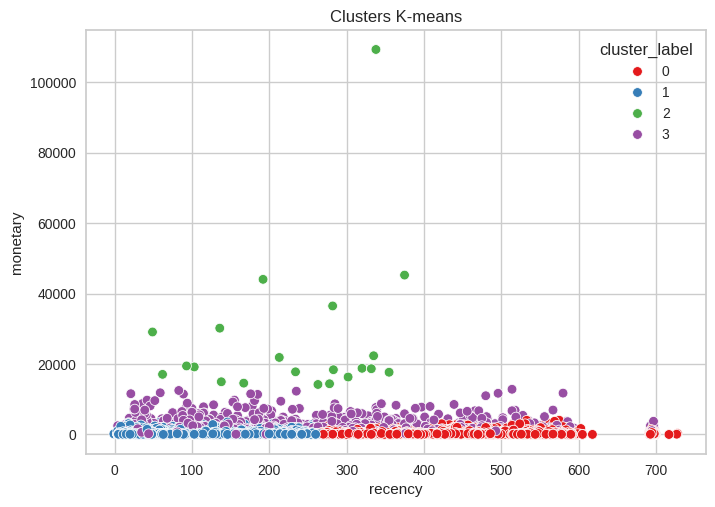

In [24]:
sns.scatterplot(data=rfm, x='recency', y='monetary', hue='cluster_label', palette='Set1')
plt.title("Clusters K-means")
plt.show()

## **Clustering avec la méthode Classification ascendante hierarchique en utilisant un échantillon**

### **Création d'un échantillon**

In [25]:
rfm2 = rfm.drop('cluster_label', axis=1)

In [26]:
proportion_echantillon = 0.2
rfm_echantillon = rfm2.sample(frac=proportion_echantillon, random_state=42)

print(rfm_echantillon)

                                  recency  frequency  monetary
customer_id                                                   
32217e3d1646bc53e60f94b1bb5db968      185          1    154.10
6afda3daa8873ace2e6ca5fc0bff2ead      368          1     31.77
5a5a2395b3f4e05559e4d319a85bb8f0      388          1     76.76
4325c54ed368291d45bb4e42dc2a15dd      376          1     73.34
3e516de4095918fe6240ec044580c115      106          1    110.26
...                                   ...        ...       ...
ee977261d6f914894ef5ac1a21968224      344          1    106.16
85656b4b0f9caf3178455f3abff2b142      376          1    230.83
0199164bec886c94218205248559d7b6      187          1    195.71
7972adc90c55b1426a19d090b47a8a1b      294          1    336.48
7fe9e9279e99a8cedebba562afb56986      129          1     98.70

[19733 rows x 3 columns]


## **Normalisation de l'échantillon**

In [27]:
rfm_echantillon_log = np.log1p(rfm_echantillon)
scaler = StandardScaler()
sample_rfm_normalized = scaler.fit_transform(rfm_echantillon_log)

### **Construction de la matrice des distances**

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples

linkage_matrix = linkage(sample_rfm_normalized, method='ward', metric='euclidean')
linkage_matrix

array([[3.10000000e+01, 8.59900000e+03, 0.00000000e+00, 2.00000000e+00],
       [5.87500000e+03, 1.78280000e+04, 0.00000000e+00, 2.00000000e+00],
       [1.33810000e+04, 1.77730000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [3.94580000e+04, 3.94590000e+04, 1.14197197e+02, 1.28440000e+04],
       [3.94600000e+04, 3.94620000e+04, 1.52041751e+02, 1.73410000e+04],
       [3.94610000e+04, 3.94630000e+04, 1.88801190e+02, 1.97330000e+04]])

### **Construction du dendogramme**

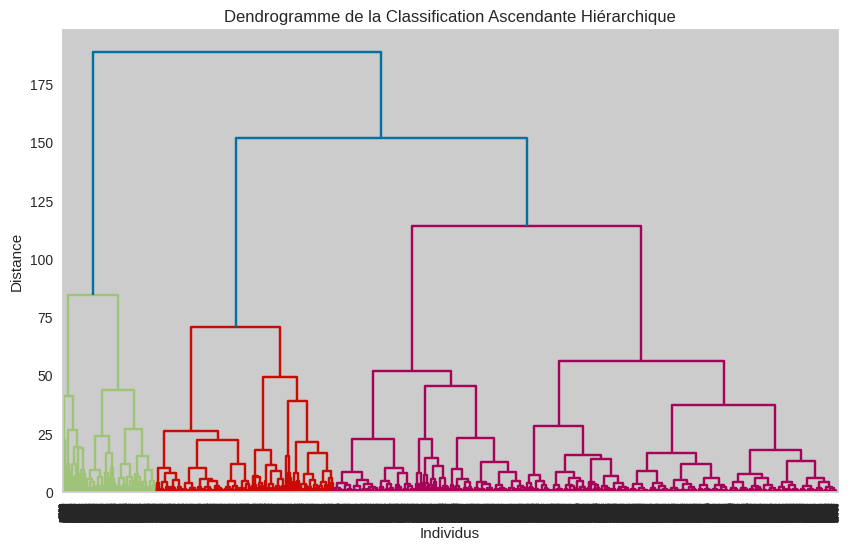

In [29]:
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title('Dendrogramme de la Classification Ascendante Hiérarchique')
plt.xlabel('Individus')
plt.ylabel('Distance')
plt.show()

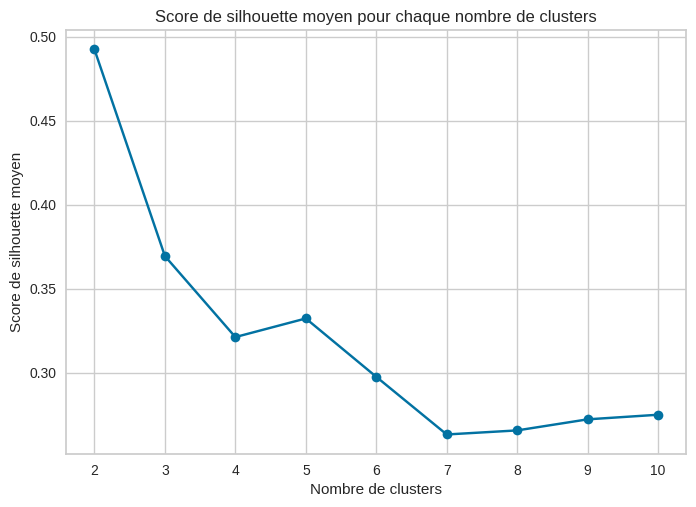

In [30]:
max_clusters = 10
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(sample_rfm_normalized, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(sample_rfm_normalized, clusters)
    silhouette_scores.append(silhouette_avg)


plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

On deduit du dendogramme que le nombre de clusters optimal est 5

In [31]:
num_clusters = 5

clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

rfm_echantillon['Cluster_cah'] = clusters

rfm_echantillon

,recency,frequency,monetary,Cluster_cah
customer_id,,,,
32217e3d1646bc53e60f94b1bb5db968,185,1,154.10,5
6afda3daa8873ace2e6ca5fc0bff2ead,368,1,31.77,5
5a5a2395b3f4e05559e4d319a85bb8f0,388,1,76.76,5
4325c54ed368291d45bb4e42dc2a15dd,376,1,73.34,5
3e516de4095918fe6240ec044580c115,106,1,110.26,3
...,...,...,...,...
ee977261d6f914894ef5ac1a21968224,344,1,106.16,5
85656b4b0f9caf3178455f3abff2b142,376,1,230.83,4
0199164bec886c94218205248559d7b6,187,1,195.71,4


In [32]:
rfm_echantillon['Cluster_cah'].value_counts()

5    7944
4    4900
3    4497
2    1789
1     603
Name: Cluster_cah, dtype: int64

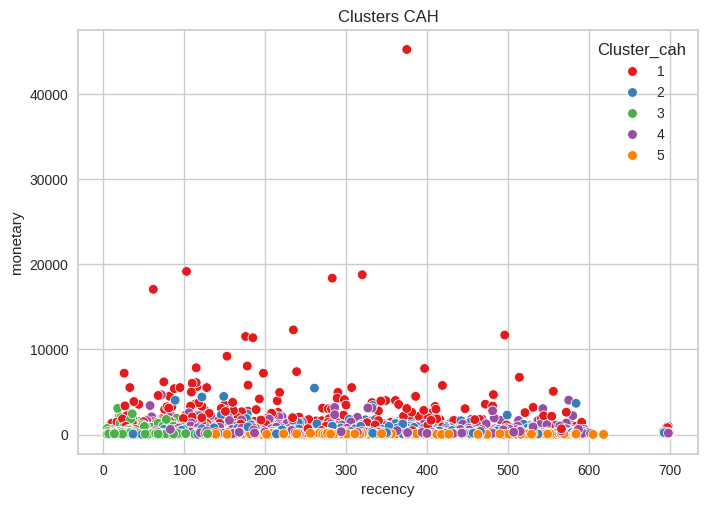

In [33]:
sns.scatterplot(data=rfm_echantillon, x='recency', y='monetary', hue='Cluster_cah', palette='Set1')
plt.title("Clusters CAH")
plt.show()

## **Clustering avec DBSCAN**

In [34]:
from sklearn.cluster import DBSCAN

In [35]:
dbscan = DBSCAN(eps=0.2, min_samples=100)


dbscan.fit(sample_rfm_normalized)


cluster_labels = dbscan.labels_


rfm_echantillon['Cluster_dbscan'] = cluster_labels


rfm_echantillon

,recency,frequency,monetary,Cluster_cah,Cluster_dbscan
customer_id,,,,,
32217e3d1646bc53e60f94b1bb5db968,185,1,154.10,5,0
6afda3daa8873ace2e6ca5fc0bff2ead,368,1,31.77,5,0
5a5a2395b3f4e05559e4d319a85bb8f0,388,1,76.76,5,0
4325c54ed368291d45bb4e42dc2a15dd,376,1,73.34,5,0
3e516de4095918fe6240ec044580c115,106,1,110.26,3,0
...,...,...,...,...,...
ee977261d6f914894ef5ac1a21968224,344,1,106.16,5,0
85656b4b0f9caf3178455f3abff2b142,376,1,230.83,4,0
0199164bec886c94218205248559d7b6,187,1,195.71,4,0


In [36]:
rfm_echantillon['Cluster_dbscan'].value_counts()

 0    14193
-1     5540
Name: Cluster_dbscan, dtype: int64

### **Visualisation des groupes**

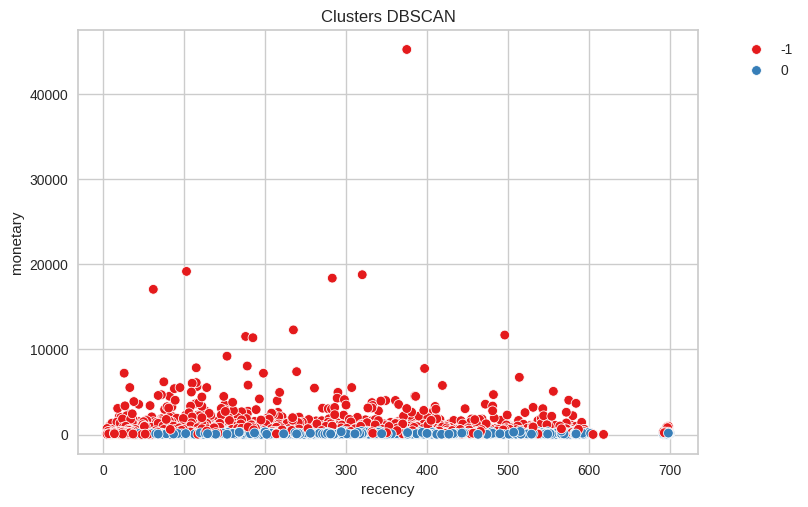

In [37]:
sns.scatterplot(data=rfm_echantillon, x='recency', y='monetary', hue='Cluster_dbscan', palette='Set1')
plt.title("Clusters DBSCAN")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

## **Clustering Kmeans avec le fichier RFM et deux autres features**

In [38]:
PRESENT = dt.datetime(2018, 9, 3)
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

In [39]:
RFM = data.groupby('customer_id').agg({'order_purchase_timestamp': lambda date: (PRESENT - date.max()).days,
                                        'order_id': lambda num: len(num),
                                      'payment_value': lambda payment_value: payment_value.sum(),
                                      'review_score': lambda review_score: review_score.mean(),
                                      'order_item_id': lambda order_item_id: order_item_id.sum()})

In [40]:
RFM

,order_purchase_timestamp,order_id,payment_value,review_score,order_item_id
customer_id,,,,,
00012a2ce6f8dcda20d059ce98491703,292,1,114.74,1.0,1
000161a058600d5901f007fab4c27140,413,1,67.41,4.0,1
0001fd6190edaaf884bcaf3d49edf079,551,1,195.42,5.0,1
0002414f95344307404f0ace7a26f1d5,382,1,179.35,5.0,1
000379cdec625522490c315e70c7a9fb,153,1,107.01,4.0,1
...,...,...,...,...,...
fffcb937e9dd47a13f05ecb8290f4d3e,169,1,91.91,5.0,1
fffecc9f79fd8c764f843e9951b11341,157,3,81.36,3.0,3
fffeda5b6d849fbd39689bb92087f431,103,1,63.13,4.0,1


### **Description du nouveau dataframe**

In [41]:
RFM.isnull().sum()

order_purchase_timestamp      0
order_id                      0
payment_value                 0
review_score                749
order_item_id                 0
dtype: int64

### **Imputation des NAN par le mode**

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(strategy='most_frequent')
RFM = pd.DataFrame(imputer.fit_transform(RFM), columns=RFM.columns)

### **Analyse des corrélation entre features**

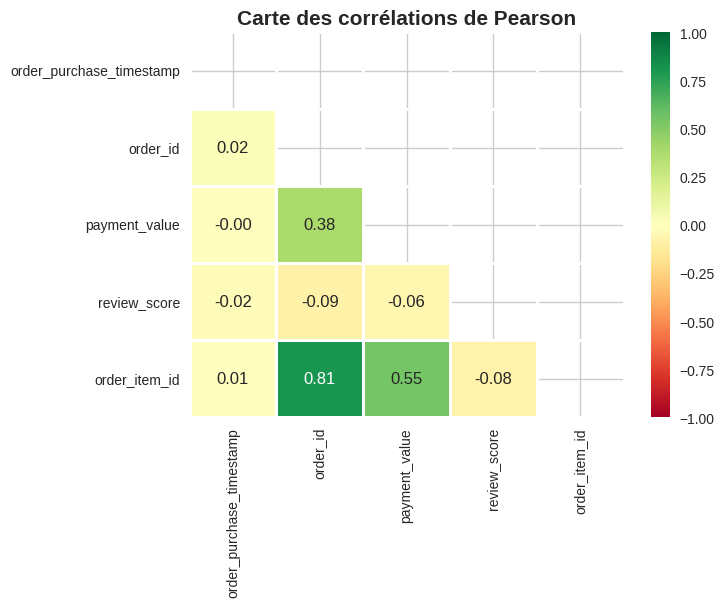

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(7,5))
mask = np.triu(np.ones_like(RFM.corr(), dtype=bool))
sns.heatmap(RFM.corr(), mask=mask, center=0, cmap='RdYlGn',
            linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Carte des corrélations de Pearson', fontsize = 15, fontweight='bold')
plt.show()

Il y a pratiquement pas de corrélation entre les différentes variables. Seules une corrélation naturelle, positive et forte existe entre le nombre de commandes et le nombre d'items. Et aussi entre le nombre d'items et le montant du paiement

In [45]:
scaler = StandardScaler()
RFM_normalized = scaler.fit_transform(RFM)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

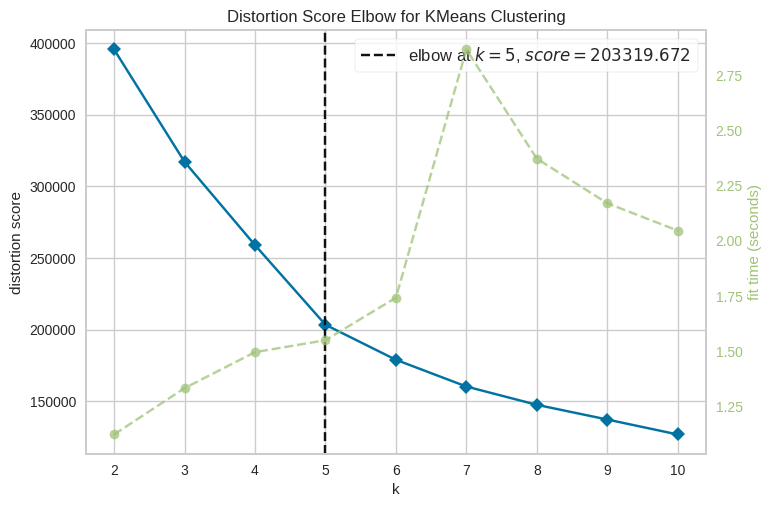

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
random_seed = 42
kmeans = KMeans(n_clusters=(2,12), n_init=10, random_state=random_seed)
kmeans_visualizer = Pipeline([
      ("kelbowvisualizer", KElbowVisualizer(KMeans()))])
kmeans_visualizer.fit(RFM_normalized)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

De ce graphique, on conclue que le nombre optimal de k est 5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


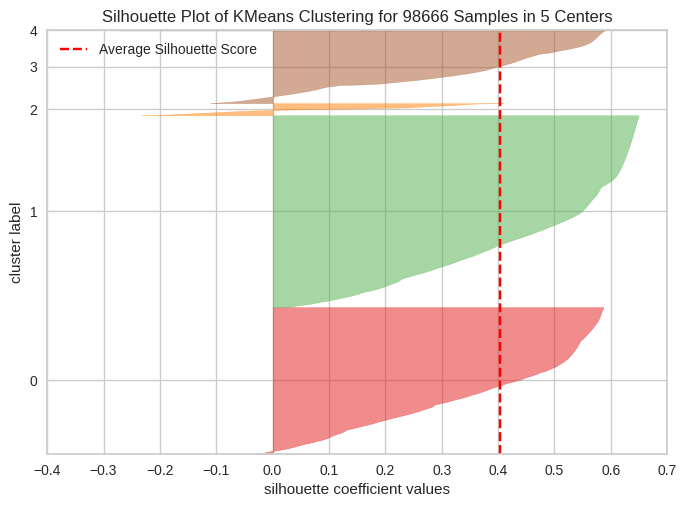

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 98666 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_


silhouette_visualizer = Pipeline([
       ("silhouettevisualizer", SilhouetteVisualizer(KMeans(5)))])
silhouette_visualizer.fit(RFM_normalized)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

In [48]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(RFM_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [49]:
RFM['cluster_label'] = kmeans.labels_
centroids = kmeans.cluster_centers_
RFM

,order_purchase_timestamp,order_id,payment_value,review_score,order_item_id,cluster_label
0,292.0,1.0,114.74,1.0,1.0,0
1,413.0,1.0,67.41,4.0,1.0,1
2,551.0,1.0,195.42,5.0,1.0,1
3,382.0,1.0,179.35,5.0,1.0,1
4,153.0,1.0,107.01,4.0,1.0,3
...,...,...,...,...,...,...
98661,169.0,1.0,91.91,5.0,1.0,3
98662,157.0,3.0,81.36,3.0,3.0,0
98663,103.0,1.0,63.13,4.0,1.0,3
98664,81.0,1.0,214.13,5.0,1.0,3


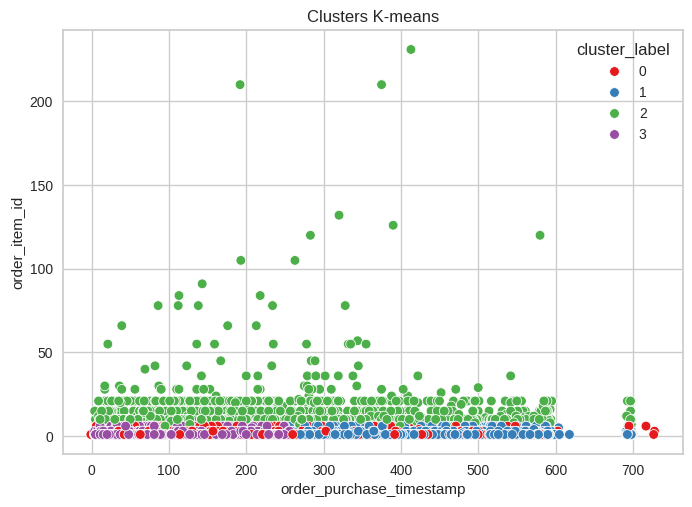

In [50]:
sns.scatterplot(data=RFM, x='order_purchase_timestamp',y='order_item_id', hue='cluster_label', palette='Set1')
plt.title("Clusters K-means")
plt.show()

Text(0.5, 0.92, 'Clustering K-means en 3D')

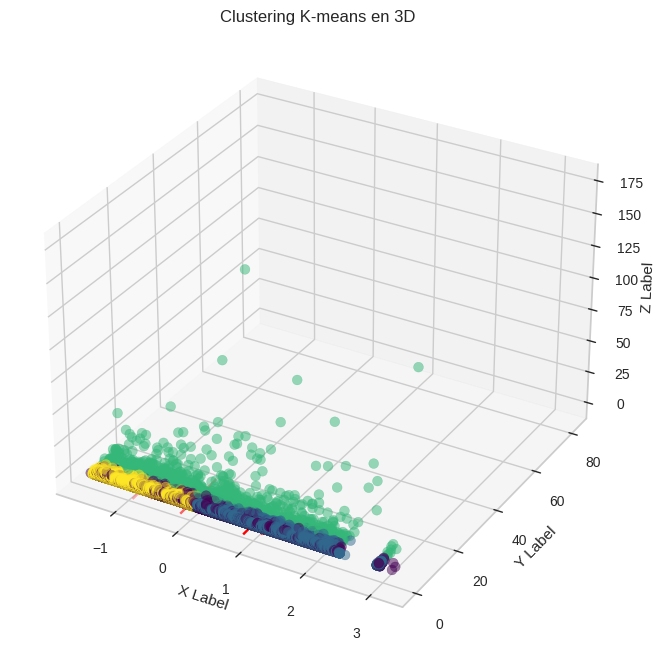

In [51]:
# Créer un graphique en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Afficher les points de données
ax.scatter(RFM_normalized[:, 0],RFM_normalized[:, 1], RFM_normalized[:, 2], c=RFM['cluster_label'], cmap='viridis', s=50, alpha=0.5)

# Afficher les centroïdes des clusters
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='x', s=200)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('Clustering K-means en 3D')

In [52]:
cluster_stats = RFM.groupby('cluster_label')[RFM.columns].mean()
cluster_stats

,order_purchase_timestamp,order_id,payment_value,review_score,order_item_id,cluster_label
cluster_label,,,,,,
0,244.686889,1.241806,218.612243,1.623538,1.466647,0.0
1,398.417778,1.136549,174.206587,4.639626,1.237478,1.0
2,253.060732,5.656406,2391.124285,3.425957,15.489185,2.0
3,127.802966,1.112556,169.628448,4.679941,1.201230,3.0


In [53]:
RFM_clusters = cluster_stats.drop('cluster_label', axis=1)

In [56]:
import plotly.graph_objs as go
def plot_radars(data, group):
    """
    Affiche un diagramme radar comparant les moyennes par variable des clusters.

    Args:
        data (DataFrame): Les données à visualiser. Chaque ligne représente une observation, et chaque colonne une variable.
        group (str): Le nom de la colonne contenant les étiquettes de regroupement (clusters).

    Returns:
        None

    Note:
        Cette fonction utilise la bibliothèque Plotly pour générer le diagramme radar.

    Exemple:
        >>> plot_radars(dataframe, 'Cluster_Labels')
    """
    scaler = StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(data),
                        index=data.index,
                        columns=data.columns).reset_index()

    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r=data[data[group]==k].iloc[:,1:].values.reshape(-1),
            theta=data.columns[1:],
            fill='toself',
            name='Cluster '+str(k)
        ))

    fig.update_layout(
        polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
        showlegend=True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color="blue",
        title_font_size=18)

    fig.show()

In [59]:
RFM_clusters.columns=['recency', 'frequency', 'monetary', 'review', 'nbre-items']

In [60]:
plot_radars(data=RFM_clusters,
            group="cluster_label")

**Interprétation métier et profils des clusters**¶


*   Groupe 0 : Ce sont des anciens clients avec de bonnes notations. Mais qui achetent peu de produits et de petits montants.

*   Groupe 1 : Ce sont des clients qui achetent peu avec de faibles montant. Par contre ils ont de bons notations. Leur dernière commande remonte depuis un certain temps.

*   Groupe 2 : Ce sont desclients qui dépenses beacoup. Ils achetent regulièrement beaucoup d'articles. Mais ils sont mécontents avec des mauvaises notations dûes certainements à d'autres paramètres.

*   Groupe 3 : Ce sont des clients qui ont achété recemment et sont très contents de leurs achats. Néanmoins ils commandés peu d'articles avec de faibles montants.



